In [1]:
import sys
!{sys.executable} -m pip install matplotlib imageio zarr

In [2]:
from multiscale_spatial_image import to_multiscale
from spatial_image import to_spatial_image
import imageio.v3 as iio
import zarr

In [3]:
name = 'chelsea'
with iio.imopen(f"imageio:{name}.png", "r") as image_file:
    props = image_file.properties()
    # props.spacing, if available, can be used to specify to_spatial_image `scale`
    array = image_file.read()

c:\Users\Johan\mambaforge\envs\napari-omero\Lib\site-packages\imageio\core\util.py:508: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [4]:
dims = ['y', 'x', 'c']
image = to_spatial_image(array, dims=dims, name=name, c_coords=['r', 'g', 'b'])

In [5]:
multiscale = to_multiscale(image, [2, 4])
print(multiscale)

<xarray.DataTree>
Group: /
├── Group: /scale0
│       Dimensions:  (y: 300, x: 451, c: 3)
│       Coordinates:
│         * y        (y) float64 2kB 0.0 1.0 2.0 3.0 4.0 ... 296.0 297.0 298.0 299.0
│         * x        (x) float64 4kB 0.0 1.0 2.0 3.0 4.0 ... 447.0 448.0 449.0 450.0
│         * c        (c) int64 24B 0 1 2
│       Data variables:
│           chelsea  (y, x, c) uint8 406kB dask.array<chunksize=(256, 256, 1), meta=np.ndarray>
├── Group: /scale1
│       Dimensions:  (y: 150, x: 225, c: 3)
│       Coordinates:
│         * y        (y) float64 1kB 0.0 2.0 4.0 6.0 8.0 ... 292.0 294.0 296.0 298.0
│         * x        (x) float64 2kB 0.0 2.0 4.0 6.0 8.0 ... 442.0 444.0 446.0 448.0
│         * c        (c) int64 24B 0 1 2
│       Data variables:
│           chelsea  (y, x, c) uint8 101kB dask.array<chunksize=(150, 225, 1), meta=np.ndarray>
└── Group: /scale2
        Dimensions:  (y: 75, x: 112, c: 3)
        Coordinates:
          * y        (y) float64 600B 0.0 4.0 8.0 12.0 16.0 

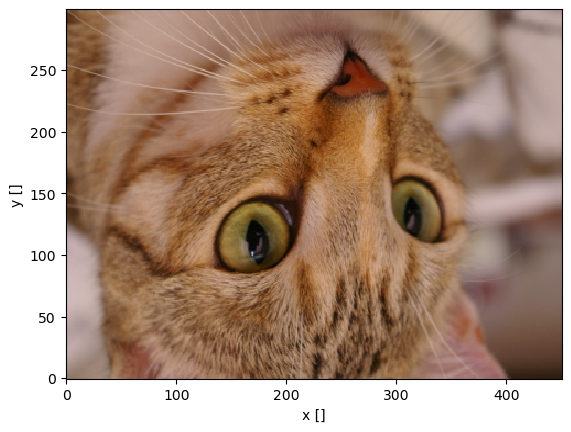

In [6]:
multiscale['scale0'].ds.chelsea.plot.imshow()

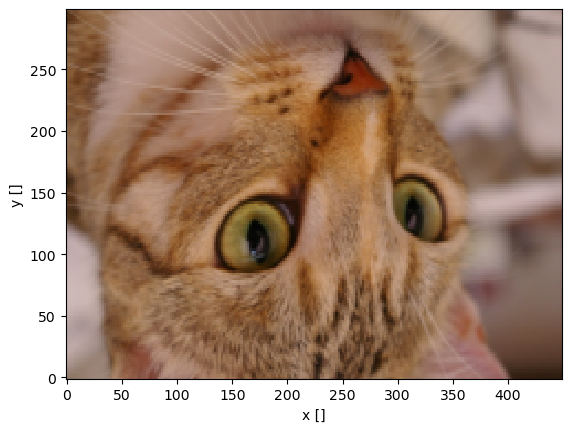

In [7]:
multiscale['scale1'].ds.chelsea.plot.imshow()

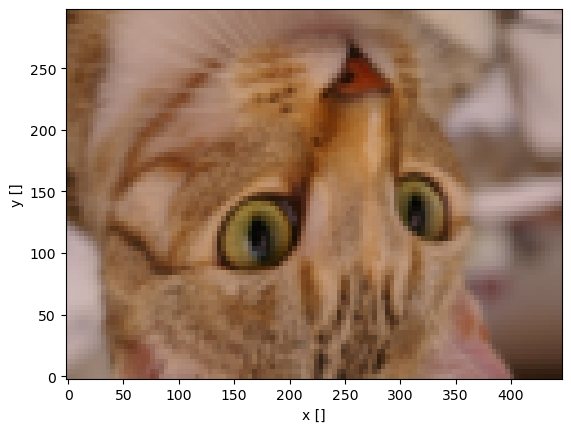

In [8]:
multiscale['scale2'].ds.chelsea.plot.imshow()

In [9]:
from packaging.version import Version
if Version(zarr.__version__) < Version("3.0.0"):
    from zarr.storage import DirectoryStore
    store = DirectoryStore(f'{name}.zarr', dimension_separator='/')
elif Version(zarr.__version__) >= Version("3.0.0"):
    from zarr.storage import LocalStore
    store = LocalStore(f'{name}.zarr')

multiscale.to_zarr(store, mode='w')

c:\Users\Johan\mambaforge\envs\napari-omero\Lib\site-packages\zarr\api\asynchronous.py:228: UserWarning: Consolidated metadata is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  warnings.warn(
